In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def train_test_split(X, y, percent):
    split = int(len(X)*percent)
    X_train, y_train = X[:split], y[:split]
    X_test, y_test = X[split:], y[split:]
    
    return X_train, y_train, X_test, y_test
    
class LogReg:
    def __init__(self, lr=0.01, n_iters = 1000):
        self.n_iters = n_iters
        self.lr = lr
        self.weights = None
        self.bias = 0
        
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
        
    def fit(self, X, y):
        
        n, features = X.shape
        self.weights = np.random.rand(features)
        
        for i in range(self.n_iters):
            z = X@self.weights+self.bias
            y_preds = self.sigmoid(z)
            
            dw = (1/n)*X.T@(y_preds-y)
            db = (1/n)*np.sum(y_preds-y)
            
            self.weights -= self.lr*dw
            self.bias -= self.lr*db
        
        return [self.weights, self.bias]
        
    def predict(self, X, probas = False):
        z = X@self.weights+self.bias
        y_preds = self.sigmoid(z) 
        if probas == False:
            return [1 if x>=0.5 else 0 for x in y_preds]
        return y_preds
        
def accuracy(y_true, y_preds):
    trues = 0
    for i in range(len(y_true)):
        if y_true[i] == y_preds[i]:
            trues += 1
    return trues/len(y_true)

In [23]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 100, n_features = 2, n_redundant = 0, n_informative = 2, n_clusters_per_class = 1, random_state = 42)

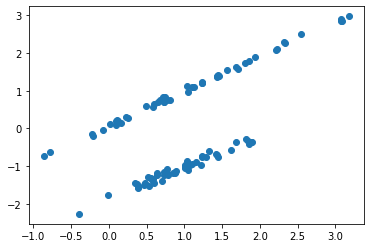

In [24]:
plt.scatter(X[:,0], X[:,1]);

In [25]:
X_train, y_train, X_test, y_test = train_test_split(X, y, 0.8)

In [45]:
lr = LogReg(n_iters = 6000)
lr.fit(X_train, y_train)

[array([-1.49085091,  3.60783002]), 1.4088159964924842]

In [46]:
preds = lr.predict(X_test)

In [47]:
accuracy(y_test, preds)

1.0